# Matrix Profile MPlots
> Entendiendo los MPLOTS para intentar la propuesta de Eaonn Keogh
> Objetivo: Tener un tab equivalente al de los embeddings en el que en lugar de analizarse el plot de Embeddings se analice un MPlot


## Artículos de Eon Keogh en los que se describen los MPlots
- [IEEE - Matrix Profile XXVI: Mplots: Scaling Time Series Similarity Matrices to Massive Data](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10027730)

## Apuntes interesantes de similarity matrix y distance matrix
- [Similarity Measures and Dimensionality Reduction Techniques for Time Series Data Mining](https://www.intechopen.com/chapters/39030)

## Ejemplos de uso de recurrence plot
CUIDADO, no son exactamente lo mismo que los MPlots. Según el artículo de Eaonn, las principales diferencias son: 
- Los recurrence/dot plots son discretos. Cada celda de la matriz es binaria (1/0). En contraste, los Mplots deben tener valores reales porque queremos conocer grados relativos de similaridad. Incluyen una escala por colores dependiente del grado de similaridad para ser más visuales y concisos.
- Por su naturaleza binaria, los dot plots tienden a ser muy dispersos (muchos 0)  => Rara vez la complejidad por espacio de memoria es un problema si se utilizan herramientas como la librería de Rocío ([buscar nombre](https://www.sciencedirect.com/science/article/pii/S1877750318301352). Si no recuerdo mal, está relacionado con CHAMELEON (https://www-users.cse.umn.edu/~hanxx023/dmclass/chameleon.pdf). Efectivamente https://ieeexplore.ieee.org/abstract/document/9150424
- Cada celda en un dot plot es el resultado de un test de igualdad comparando dos escalares. Sin embargo, las celdas de Mplot hacen referencia a la comparación en distancia entre dos vectores. Mplots es mucho más pesado de computar que dot plot.
  > Me vendría muy bien un ejemplo de cómo shacerlo a mano paso a paso para ver esto con mis propios ojos, aunque sea obvio
- Los dot plot solo son útiles para encontrar similitudes. Sin embargo, en los Mplots se busca comparar dos datasets para encontrar tanto similaritudes como violaciones de la conservación (dissimilitudes)


Ejemplos:
- [Neurociencia PhD](https://www.youtube.com/watch?v=WZ-QLbHkHbc)

## Tratando de entender las Time Series similarity matrices / recurrence plots

Un Time Series Similarity Matrix o Recurrence Plot es una herramienta útil en el análisis de datos de series temporales. Permite visualizar y cuantificar las recurrencias en los datos, es decir, los momentos en los que un sistema o conjunto de datos visita un estado previo o uno muy similar en el espacio de fase.

La construcción de un Recurrence Plot implica la creación de una matriz de recurrencia, donde los ejes representan el tiempo y los puntos dentro de la matriz indican los momentos en los que los estados del sistema son similares o idénticos. En práctica, esta matriz se traduce en un gráfico donde los patrones de puntos revelan la dinámica temporal de los datos, ayudando a identificar ciclos, tendencias estacionarias, o cambios estructurales dentro de la serie temporal.

El proceso comienza con la selección de un conjunto de datos o trayectoria, seguido de la definición de un umbral de similitud para determinar qué puntos se consideran recurrencias. El resultado es una representación gráfica, a menudo utilizando caracteres ASCII o Unicode para facilitar la visualización en diferentes plataformas sin necesidad de gráficos complejos.

Este tipo de análisis es valioso en diversos campos, como la física, la biología y las finanzas, donde se estudian sistemas dinámicos y se desea comprender la naturaleza de las dependencias temporales en los datos.

Para más detalles y ejemplos de cómo generar y interpretar Recurrence Plots, puedes consultar fuentes como la documentación de RecurrenceAnalysis.


[Julia dynamics](https://juliadynamics.github.io/RecurrenceAnalysis.jl/v2.0/rplots/)
[Julia dynamics 2](https://juliadynamics.github.io/DynamicalSystems.jl/v1.5/rqa/rplots/)
--> Buscar mejores tutoriales



### Siguiendo el tutorial de pyts
[Johann Faouzi](https://pyts.readthedocs.io/en/stable/auto_examples/image/plot_dataset_rp.html)

A recurrence plot is an image obtained from a time series, representing the pairwise Euclidean distances for each value (and more generally for each trajectory) in the time series. The image can be binarized using a threshold. It is implemented as pyts.image.RecurrencePlot.

In this example, we consider the training samples of the GunPoint dataset, consisting of 50 univariate time series of length 150. The recurrence plot of each time series is independently computed and the 50 recurrence plots are plotted.

#### Install the library

In [1]:
! pip install pyts

#### Mandatory imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [15]:
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint

#### Carga de dataset genérico: GunPoint dataset
> Contiene 50 series temporales cortas (longitud 150). 

In [3]:
from pyts.datasets import load_gunpoint
X, _, _, _ = load_gunpoint(return_X_y=True)

In [4]:
X

array([[-0.6478854 , -0.64199155, -0.63818632, ..., -0.64042873,
        -0.63866571, -0.63865722],
       [-0.64442658, -0.64540093, -0.64705511, ..., -0.6349345 ,
        -0.6344968 , -0.63159565],
       [-0.77835282, -0.77827907, -0.77715084, ..., -0.70419626,
        -0.70760524, -0.7071202 ],
       ...,
       [-0.77912617, -0.77837863, -0.7757449 , ..., -0.50500603,
        -0.50373099, -0.50438486],
       [-0.70303339, -0.70261754, -0.70250356, ..., -0.64113375,
        -0.64140622, -0.64210896],
       [-1.4357199 , -1.4322717 , -1.4329285 , ..., -1.4354619 ,
        -1.4352821 , -1.4308845 ]])

In [10]:
X.shape

(50, 150)

#### Obtenemos el plot de recurrencia para todas las series temporales

In [5]:
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(X)

In [9]:
print(X_rp[:1])
print(X_rp.shape)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]
(50, 150, 150)


#### Ejemplo del primer plot

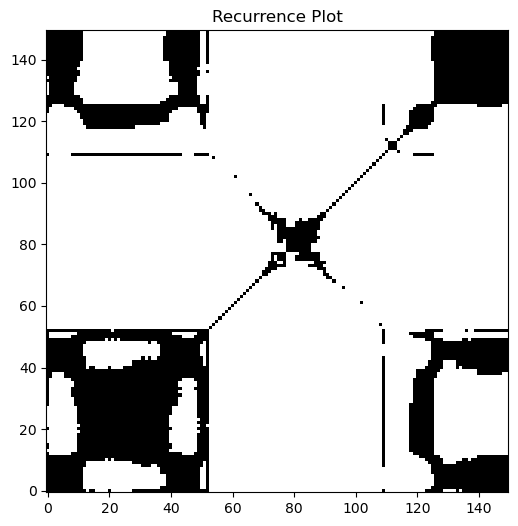

In [11]:
plt.figure(figsize=(6, 6))
plt.imshow(X_rp[0], cmap='binary', origin='lower')
plt.title('Recurrence Plot')
plt.show()

#### Mostramos los 50 plots

In [ ]:
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.1, share_all=True)
for i, ax in enumerate(grid):
    ax.imshow(X_rp[i], cmap='binary', origin='lower')
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])

fig.suptitle(
    "Recurrence plots for the 50 time series in the 'GunPoint' dataset",
    y=0.92
)

plt.show()

## Go Stumpy!

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.gridspec import GridSpec

In [8]:
import stumpy

In [ ]:
### Siguiendo el ejemplo del vídeo de stumpy

In [9]:
import utils.memory as mem
mem.gpu_memory_status()

GPU | Used mem: 16668
GPU | Used mem: 24576
GPU | Memory Usage: [█████████████-------] 68%


### Ejemplo del video de Stumpy

#### Inicializamos los parámetros

In [20]:
ts = np.random.rand(10000)
m = 50
mp = stumpy.gpu_stump(ts, m)

In [21]:
mp.shape

(9951, 4)

#### Visualizar el MPlot y la serie temporal

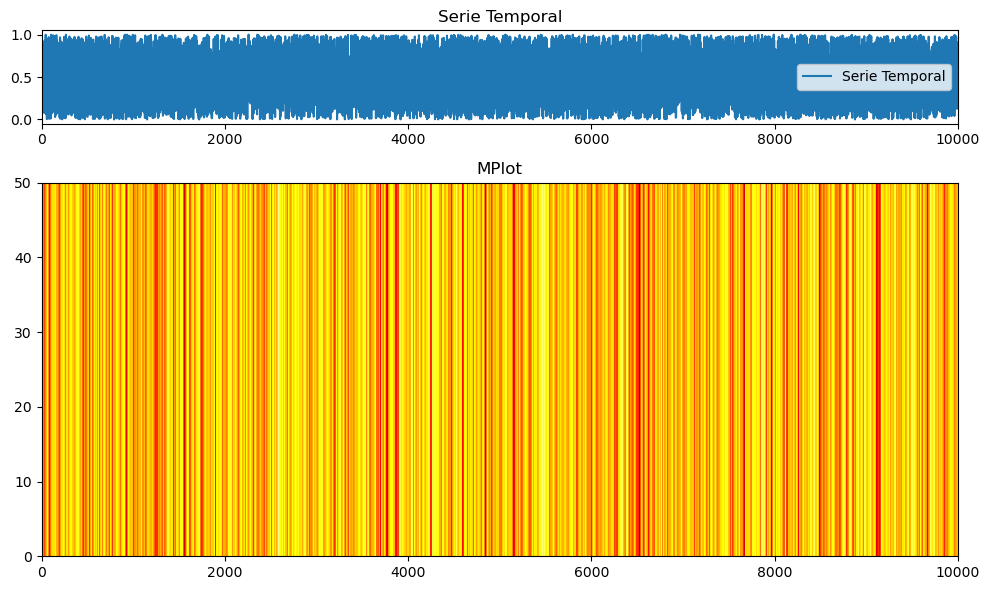

In [24]:
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 1, height_ratios=[1, 4])
# Serie temporal
ax1 = fig.add_subplot(gs[0])
ax1.plot(ts, label="Serie Temporal")
ax1.set_title("Serie Temporal")
ax1.legend()
# MPlot
ax2 = fig.add_subplot(gs[1], sharex=ax1)
mp_values = mp[:, 0].astype(float) # Extraer solo los valores del perfil de similitud
ax2.imshow(mp_values.reshape(-1, 1).T, aspect='auto', origin='lower', cmap='hot', extent=(0, len(ts), 0, m))
ax2.set_title("MPlot")
plt.tight_layout()
plt.show()

### Ejemplo de STUMPY Basics - Analyzing Motifs and Anomalies with STUMP
https://stumpy.readthedocs.io/en/latest/Tutorial_The_Matrix_Profile.html

In [25]:
%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

Load the dataset

In [26]:
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


In [40]:
steam_df.shape

(9600, 4)

Visualize dataset

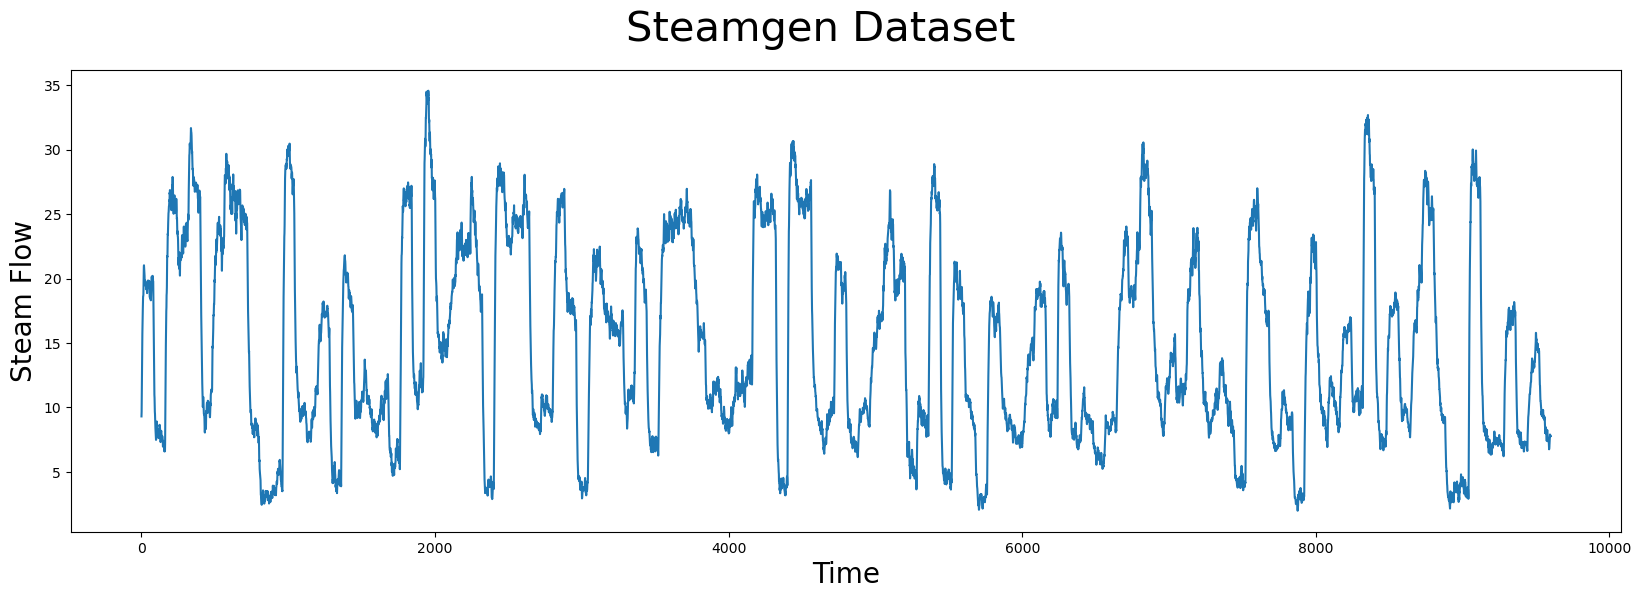

In [27]:
plt.suptitle('Steamgen Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')
plt.plot(steam_df['steam flow'].values)
plt.show()

Manually find a motif

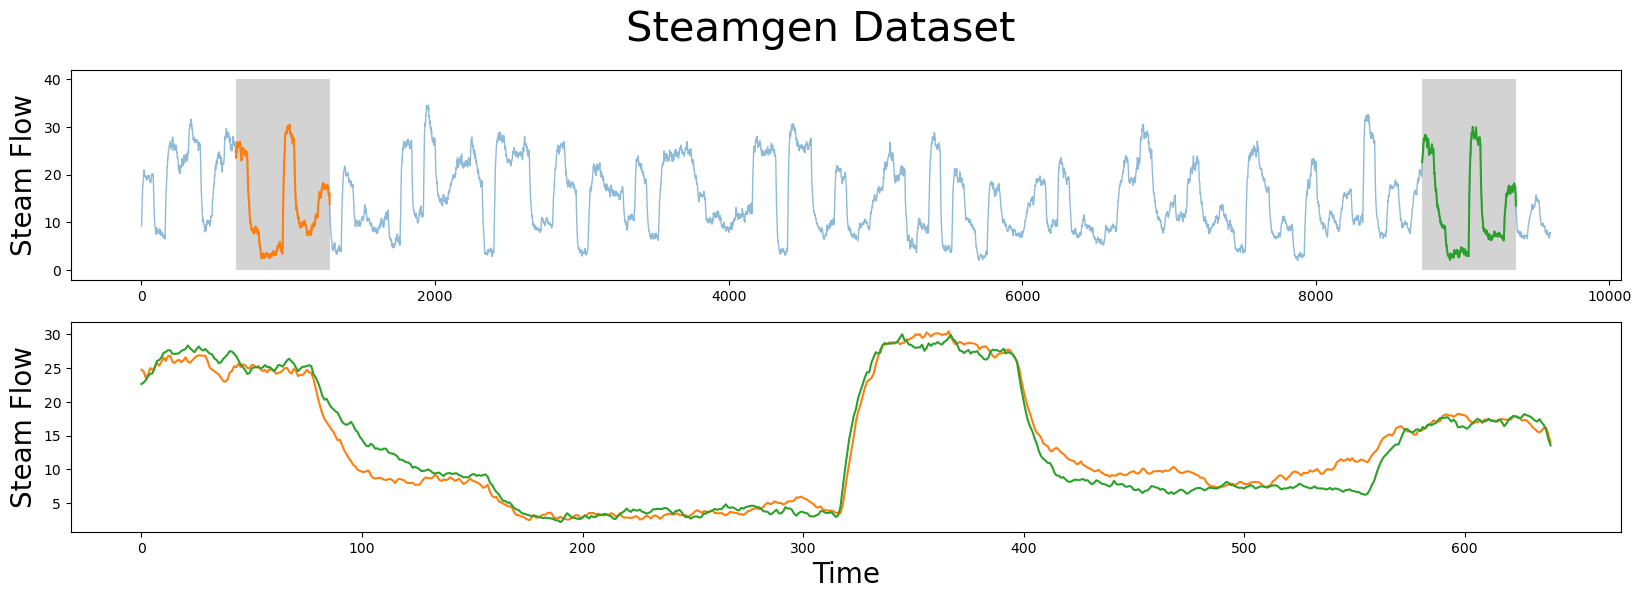

In [28]:
m = 640
fig, axs = plt.subplots(2)
plt.suptitle('Steamgen Dataset', fontsize='30')
axs[0].set_ylabel("Steam Flow", fontsize='20')
axs[0].plot(steam_df['steam flow'], alpha=0.5, linewidth=1)
axs[0].plot(steam_df['steam flow'].iloc[643:643+m])
axs[0].plot(steam_df['steam flow'].iloc[8724:8724+m])
rect = Rectangle((643, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((8724, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel("Time", fontsize='20')
axs[1].set_ylabel("Steam Flow", fontsize='20')
axs[1].plot(steam_df['steam flow'].values[643:643+m], color='C1')
axs[1].plot(steam_df['steam flow'].values[8724:8724+m], color='C2')
plt.show()

Find a motif using STUMP

In [29]:
m = 640
mp = stumpy.stump(steam_df['steam flow'], m)

- In this case, based on some domain expertise, we’ve chosen ```m = 640```, which is roughly equivalent to half-hour windows.
- And, again, the output of ```stump``` is an array that contains all of the matrix profile values (i.e., z-normalized Euclidean distance to your nearest neighbor) and matrix profile indices in the first and second columns, respectively (we’ll ignore the third and fourth columns for now).
- To identify the index location of the motif we’ll need to find the index location where the matrix profile, ```mp[:, 0]```, has the smallest value:

In [34]:
mp.shape

(8961, 4)

In [41]:
mp

array([[16.23541147724783, 2242, -1, 2242],
       [16.08191866323061, 2243, -1, 2243],
       [15.909403017873444, 2245, -1, 2245],
       ...,
       [9.02293137221496, 877, 877, -1],
       [9.038259675949304, 878, 878, -1],
       [9.054692514421284, 879, 879, -1]], dtype=object)

In [42]:
mp[:,0]

array([16.23541147724783, 16.08191866323061, 15.909403017873444, ...,
       9.02293137221496, 9.038259675949304, 9.054692514421284],
      dtype=object)

In [43]:
mp[:,0][0]

16.23541147724783

In [33]:
motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")

The motif is located at index 643


With this ```motif_idx information```, we can also identify the location of its nearest neighbor by cross-referencing the matrix profile indices, ```mp[:, 1]:```

In [36]:
nearest_neighbor_idx = mp[motif_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 8724


Todo junto

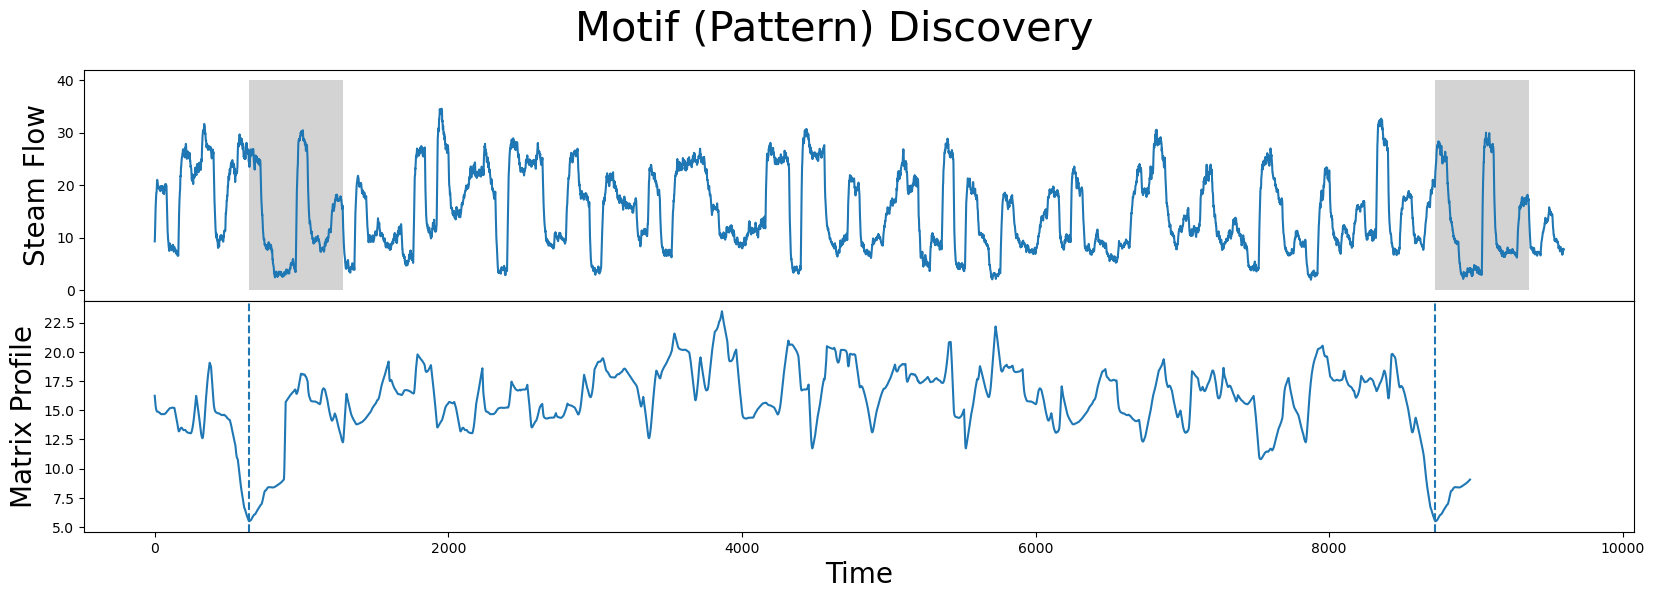

In [38]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(steam_df['steam flow'].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

What we learn is that the global minima (vertical dashed lines) from the matrix profile correspond to the locations of the two subsequences that make up the motif pair! And the exact z-normalized Euclidean distance between these two subsequences is:

In [44]:
mp[motif_idx, 0]

5.491619827769537

Discord

In [45]:
discord_idx = np.argsort(mp[:, 0])[-1]
print(f"The discord is located at index {discord_idx}")

The discord is located at index 3864


In [46]:
mp[discord_idx]

array([23.47616836730202, 4755, 1864, 4755], dtype=object)

In [48]:
nearest_neighbor_distance = mp[discord_idx, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is 23.47616836730202 units away


The subsequence located at this global maximum is also referred to as a discord, novelty, or “potential anomaly”:

In [ ]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(steam_df['steam flow'].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

Intentando ver la matriz Distance Profile al completo

In [62]:
m = 640

In [63]:
steam_flow = steam_df['steam flow'].values
#No nans
steam_flow = [ 0 if np.isnan(x) else x for x in steam_flow ]

In [64]:
reference_idx = np.random.randint(low=0, high=len(steam_flow) - m)
reference_subseq = steam_flow[reference_idx:reference_idx + m]

In [66]:
# Calcular el Distance Profile para cada subsecuencia en la serie temporal
distance_matrix = np.array([
    stumpy.core.mass(reference_subseq, steam_flow[i:i + m]) 
    for i in range(len(steam_flow) - m + 1)
])

In [67]:
distance_matrix.shape

(8961, 1)

...Y aquí está el problema! Estás cogiendo solo 1 subsequencia! Es un Distance profile, no un Matrix Profile. Además, el Matrix Profile debería tener una fila por cada DP, lo que significa que lo tenemos traspuesto!!! CUIDADO

In [89]:
n = len (steam_flow) # Numero de puntos de la serie temporal
subsequence_len = 640 # Tamaño ventana
m = subsequence_len

In [88]:
subsequence_len

640

In [92]:
len(steam_flow) - m + 1

8961

In [69]:
# Inicialización de la matriz asociada al MPlot
MPlot_matrix = np.empty((n - m + 1, n - m + 1))

In [81]:
# Calcular el Distance Profile para cada subsecuencia en la serie temporal
distance_matrix = np.array([
    stumpy.core.mass(reference_subseq, steam_flow[i:i + m]) 
    for i in range(len(steam_flow) - m + 1)
])

In [82]:
print(steam_flow.shape)
print(distance_matrix.shape)
print(MPlot_matrix.shape)

(9600,)
(8961, 1)
(8961, 8961)


In [94]:
#Calculamos el MPlot
for i in range(n - m + 1):
    ### Calculamos el Distance Profile utilizando el algoritmo MASS
    MPlot_matrix[i,:] = stumpy.core.mass(steam_flow[i:i + m], steam_flow)

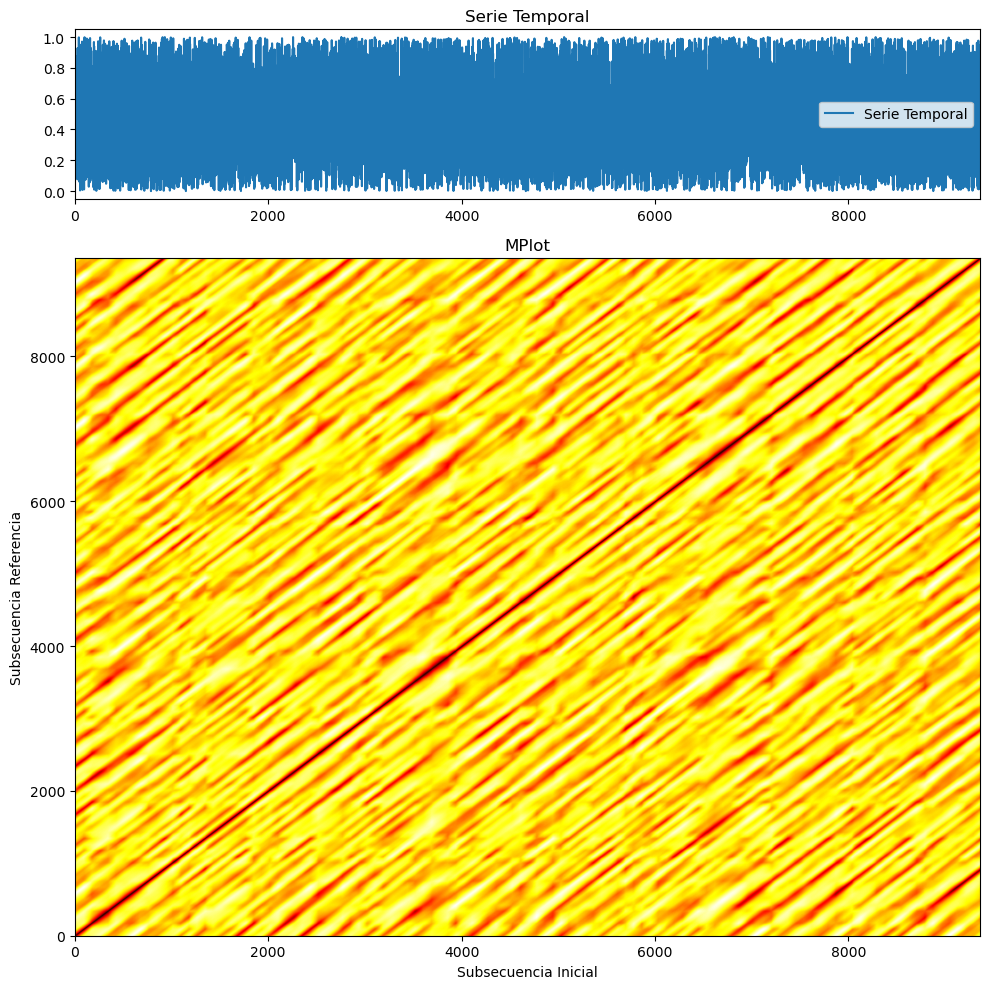

In [95]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Asumiendo que 'ts' es tu serie temporal y 'MPlot_matrix' es la matriz que has calculado
# Asegúrate de que 'ts' y 'MPlot_matrix' están definidos en tu entorno de trabajo

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 1, height_ratios=[1, 4])

# Serie temporal
ax1 = fig.add_subplot(gs[0])
ax1.plot(ts, label="Serie Temporal")
ax1.set_title("Serie Temporal")
ax1.legend()

# MPlot
ax2 = fig.add_subplot(gs[1], sharex=ax1)
# Utilizar 'imshow' para visualizar la matriz MPlot
ax2.imshow(MPlot_matrix, aspect='auto', origin='lower', cmap='hot', extent=(0, len(ts) - m, 0, len(ts) - m))
ax2.set_title("MPlot")
ax2.set_xlabel('Subsecuencia Inicial')
ax2.set_ylabel('Subsecuencia Referencia')

plt.tight_layout()
plt.show()

## Intentando downsamplear como hace Eamonn

In [97]:
### He cogido pyts porque ya la tengo, pero hay que mirar librerías

In [100]:
ts = steam_flow

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import PiecewiseAggregateApproximation

In [103]:
n_samples, n_timestamps = 1, ts.shape[0]
print(n_samples)
print(n_timestamps)

1
9600


In [104]:
downsample_factor = 4

In [107]:
expected_size = np.floor(n_timestamps/downsample_factor).astype(int)
expected_size

2400

In [108]:
paa = PiecewiseAggregateApproximation(window_size = downsample_factor) #Creo que es justo lo contrario. Adaptar

In [113]:
tss = ts.reshape(1,-1)
tss.shape

(1, 9600)

In [114]:
tss_downsampled = paa.transform(tss)

In [115]:
ts_downsampled = tss_downsampled[0]

In [117]:
# Pues parece que está bien. Y tiene sentido. Porque a cada ventana que 
# avanzamos, quitamos d elementos
ts_downsampled.shape 

(2400,)

In [118]:
def distance_matrix (reference_subseq, ts, m):
    distance_matrix = np.array([
        stumpy.core.mass(reference_subseq, ts[i:i + m]) 
        for i in range(len(ts) - m + 1)
    ])
    return distance_matrix

In [124]:
def mplot_matrix(ts, m): 
    n = ts.shape[0]
    MPlot_matrix = np.empty((n - m + 1, n - m + 1))
    for i in range(n - m + 1):
        ### Calculamos el Distance Profile utilizando el algoritmo MASS
        MPlot_matrix[i,:] = stumpy.core.mass(ts[i:i + m], ts)
    return MPlot_matrix

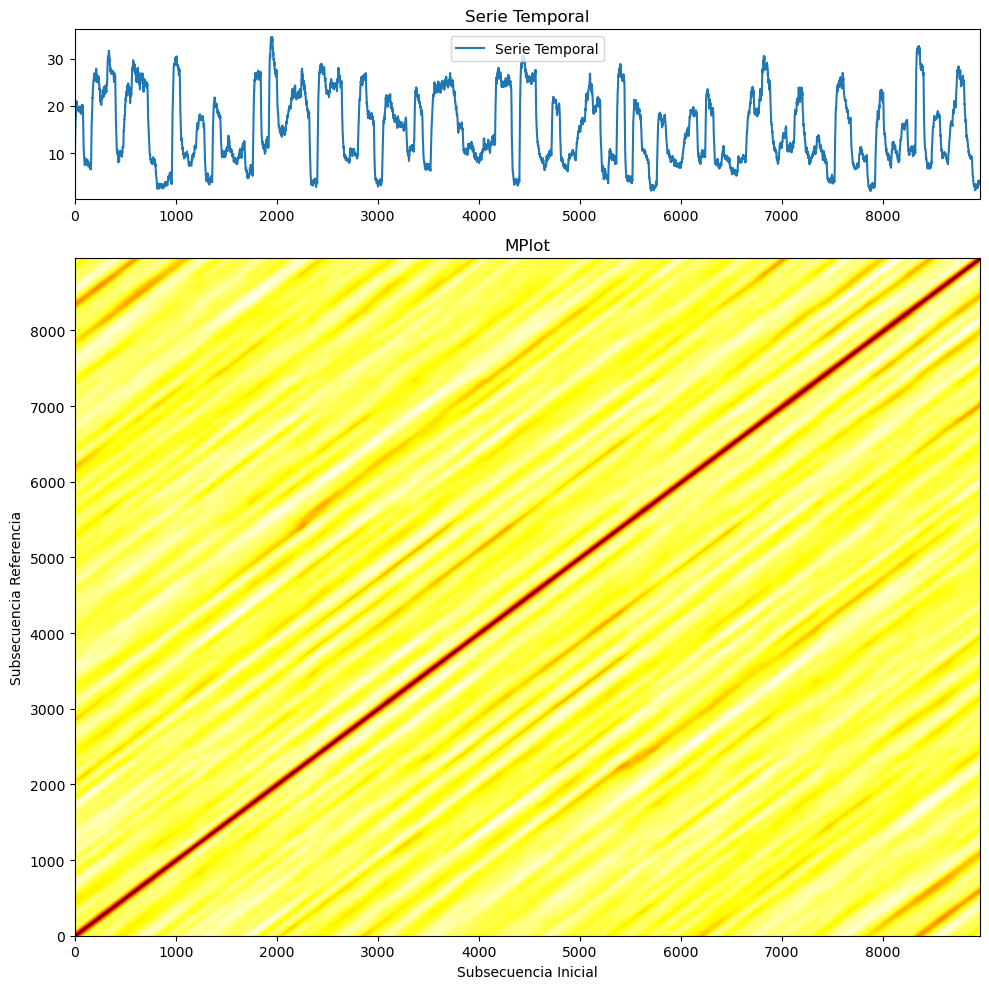

In [127]:
tsd_len = ts_downsampled.shape[0]
m = 640 #Window size
reference_idx = np.random.randint(low=0, high= tsd_len - m)
reference_subseq = ts_downsampled[reference_idx:reference_idx + m]
#distance_matrix = distance_matrix(reference_subseq, ts_downsampled, m)
MPlot_matrix = mplot_matrix(ts_downsampled, m)
# Asumiendo que 'ts' es tu serie temporal y 'MPlot_matrix' es la matriz que has calculado
# Asegúrate de que 'ts' y 'MPlot_matrix' están definidos en tu entorno de trabajo

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 1, height_ratios=[1, 4])

# Serie temporal
ax1 = fig.add_subplot(gs[0])
ax1.plot(ts, label="Serie Temporal")
ax1.set_title("Serie Temporal")
ax1.legend()

# MPlot
ax2 = fig.add_subplot(gs[1], sharex=ax1)
# Utilizar 'imshow' para visualizar la matriz MPlot
ax2.imshow(MPlot_matrix, aspect='auto', origin='lower', cmap='hot', extent=(0, len(ts) - m, 0, len(ts) - m))
ax2.set_title("MPlot")
ax2.set_xlabel('Subsecuencia Inicial')
ax2.set_ylabel('Subsecuencia Referencia')

plt.tight_layout()
plt.show()

### Ejemplo que usan en el código de MPlots run_splat de Eamonn Keogh

In [13]:
test_sine = np.concatenate([
    np.random.randn(600)/5,
    np.sin(np.arange(0,10,0.1)),
    np.random.randn(800)/5,
    np.sin(np.arange(0, 10, 0.1)),
    np.random.randn(900)/5,
    np.sin(np.arange(0, 10, 0.05)),
    np.random.randn(800)/5 
]);
#Add a little bit of noise
test_sine = test_sine + np.random.rand(*test_sine.shape) / 10
test_sine.shape

(3500,)

In [ ]:
### Seteamos los parámetros de entrada

In [14]:
x = test_sine

In [15]:
subsequence_length = 100

In [16]:
timeseriesA = np.tile(x, (9, 1)).T

In [17]:
# Inicialización a no numérico
timeseriesB = np.nan 

In [19]:
timeseriesA

array([[ 0.21519039,  0.21519039,  0.21519039, ...,  0.21519039,
         0.21519039,  0.21519039],
       [-0.10621269, -0.10621269, -0.10621269, ..., -0.10621269,
        -0.10621269, -0.10621269],
       [ 0.1887385 ,  0.1887385 ,  0.1887385 , ...,  0.1887385 ,
         0.1887385 ,  0.1887385 ],
       ...,
       [-0.10655216, -0.10655216, -0.10655216, ..., -0.10655216,
        -0.10655216, -0.10655216],
       [ 0.20555441,  0.20555441,  0.20555441, ...,  0.20555441,
         0.20555441,  0.20555441],
       [ 0.42034573,  0.42034573,  0.42034573, ...,  0.42034573,
         0.42034573,  0.42034573]])

In [ ]:
###